<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(0)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_0'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20.csv',
 'data_multi_delta_0_n30.csv',
 'data_multi_delta_0_n60.csv',
 'data_multi_delta_0_n120.csv',
 'data_multi_delta_0_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,63.826169,-0.394803,73.431366,73.987104,-0.555737
1,0.0,1.0,50.457177,-1.252188,59.204989,60.602126,-1.397137
2,0.0,2.0,47.158342,0.102551,57.260894,57.299347,-0.038453
3,0.0,3.0,37.722544,0.431166,48.153710,47.852267,0.301444
4,0.0,4.0,68.135183,-1.051646,77.083537,78.301270,-1.217733
...,...,...,...,...,...,...,...
249995,999.0,245.0,40.422662,-1.072345,49.350317,50.453165,-1.102848
249996,999.0,246.0,41.736522,1.661641,53.398164,51.767126,1.631038
249997,999.0,247.0,99.645161,0.521578,110.166739,109.680224,0.486515
249998,999.0,248.0,25.114435,0.994830,36.109265,35.143759,0.965506


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,63.826169,-0.394803,73.431366,73.987104,-0.555737
1,0.0,1.0,50.457177,-1.252188,59.204989,60.602126,-1.397137
2,0.0,2.0,47.158342,0.102551,57.260894,57.299347,-0.038453
3,0.0,3.0,37.722544,0.431166,48.153710,47.852267,0.301444
4,0.0,4.0,68.135183,-1.051646,77.083537,78.301270,-1.217733
...,...,...,...,...,...,...,...
249995,999.0,245.0,40.422662,-1.072345,49.350317,50.453165,-1.102848
249996,999.0,246.0,41.736522,1.661641,53.398164,51.767126,1.631038
249997,999.0,247.0,99.645161,0.521578,110.166739,109.680224,0.486515
249998,999.0,248.0,25.114435,0.994830,36.109265,35.143759,0.965506


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    63.826169 -0.394803   73.431366   73.987104 -0.555737
      1.0    50.457177 -1.252188   59.204989   60.602126 -1.397137
      2.0    47.158342  0.102551   57.260894   57.299347 -0.038453
      3.0    37.722544  0.431166   48.153710   47.852267  0.301444
      4.0    68.135183 -1.051646   77.083537   78.301270 -1.217733
...                ...       ...         ...         ...       ...
999.0 245.0  40.422662 -1.072345   49.350317   50.453165 -1.102848
      246.0  41.736522  1.661641   53.398164   51.767126  1.631038
      247.0  99.645161  0.521578  110.166739  109.680224  0.486515
      248.0  25.114435  0.994830   36.109265   35.143759  0.965506
      249.0  97.794724  0.315635  108.110359  107.829645  0.280714

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    63.826169 -0.394803   73.431366   73.987104 -0.555737
      1.0    50.457177 -1.252188   59.204989   60.602126 -1.397137
      2.0    47.158342  0.102551   57.260894   57.299347 -0.038453
      3.0    37.722544  0.431166   48.153710   47.852267  0.301444
      4.0    68.135183 -1.051646   77.083537   78.301270 -1.217733
...                ...       ...         ...         ...       ...
999.0 245.0  40.422662 -1.072345   49.350317   50.453165 -1.102848
      246.0  41.736522  1.661641   53.398164   51.767126  1.631038
      247.0  99.645161  0.521578  110.166739  109.680224  0.486515
      248.0  25.114435  0.994830   36.109265   35.143759  0.965506
      249.0  97.794724  0.315635  108.110359  107.829645  0.280714

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,63.826169,-0.394803,73.431366,73.987104,-0.555737
1,0.0,1.0,50.457177,-1.252188,59.204989,60.602126,-1.397137
2,0.0,2.0,47.158342,0.102551,57.260894,57.299347,-0.038453
3,0.0,3.0,37.722544,0.431166,48.153710,47.852267,0.301444
4,0.0,4.0,68.135183,-1.051646,77.083537,78.301270,-1.217733
...,...,...,...,...,...,...,...
249995,999.0,245.0,40.422662,-1.072345,49.350317,50.453165,-1.102848
249996,999.0,246.0,41.736522,1.661641,53.398164,51.767126,1.631038
249997,999.0,247.0,99.645161,0.521578,110.166739,109.680224,0.486515
249998,999.0,248.0,25.114435,0.994830,36.109265,35.143759,0.965506


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    63.826169 -0.394803   73.431366   73.987104 -0.555737
      1.0    50.457177 -1.252188   59.204989   60.602126 -1.397137
      2.0    47.158342  0.102551   57.260894   57.299347 -0.038453
      3.0    37.722544  0.431166   48.153710   47.852267  0.301444
      4.0    68.135183 -1.051646   77.083537   78.301270 -1.217733
...                ...       ...         ...         ...       ...
999.0 245.0  40.422662 -1.072345   49.350317   50.453165 -1.102848
      246.0  41.736522  1.661641   53.398164   51.767126  1.631038
      247.0  99.645161  0.521578  110.166739  109.680224  0.486515
      248.0  25.114435  0.994830   36.109265   35.143759  0.965506
      249.0  97.794724  0.315635  108.110359  107.829645  0.280714

[250000 rows x 5 columns]

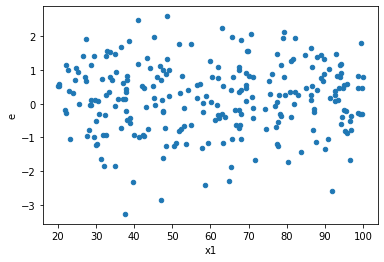

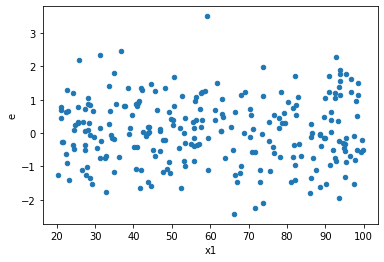

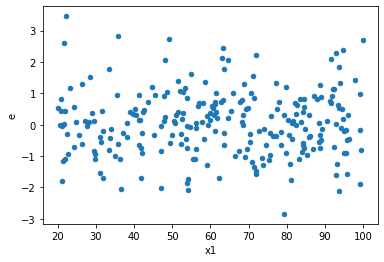

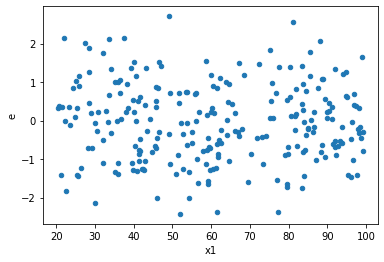

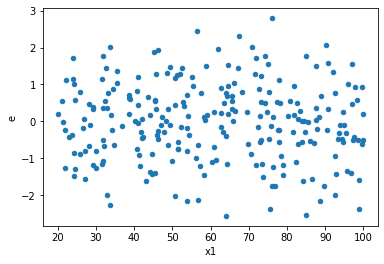

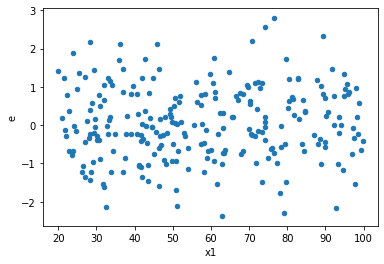

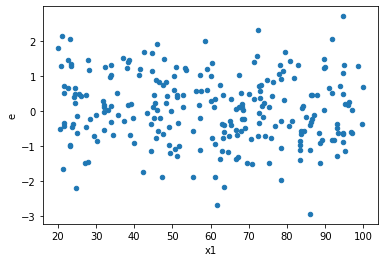

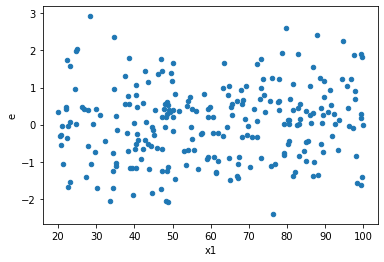

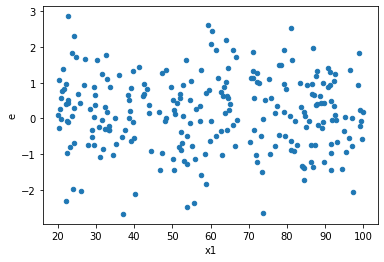

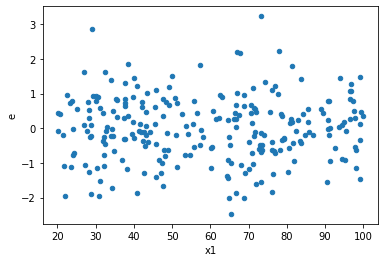

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,99.0,99.0,84.98345869136665,103.56122124045085,0.8584187746602692,1.046072941822736,1.218604453562579,0.3269376959033259,0.8365311520483371,0.16346884795166294,Reject001=1 : Homoscedasticity
4.0,99.0,99.0,93.38938855207716,115.33429285159765,0.9433271570916886,1.164992857086845,1.2349828459074155,0.2953853797606638,0.8523073101196681,0.1476926898803319,Reject001=1 : Homoscedasticity
6.0,99.0,99.0,91.16426655487916,93.15267376980097,0.9208511773220117,0.9409360986848583,1.0218112566476343,0.9147323056109895,0.5426338471945052,0.45736615280549475,Reject001=1 : Homoscedasticity
8.0,99.0,99.0,95.62236348276276,101.78651268148276,0.9658824594218461,1.0281465927422502,1.0644634683165008,0.756576329071573,0.6217118354642135,0.3782881645357865,Reject001=1 : Homoscedasticity
10.0,99.0,99.0,94.10869390269617,96.91888580420769,0.9505928677040018,0.9789786444869464,1.029861129561708,0.8839130337190935,0.5580434831404533,0.44195651685954673,Reject001=1 : Homoscedasticity
14.0,99.0,99.0,104.22023781393207,113.76907279795493,1.0527296748882027,1.1491825535146962,1.0916216963644885,0.663594764164493,0.6682026179177535,0.3317973820822465,Reject001=1 : Homoscedasticity
16.0,99.0,99.0,89.54942249302297,109.98877105904134,0.9045396211416462,1.110997687465064,1.2282465704076522,0.308054883038515,0.8459725584807425,0.1540274415192575,Reject001=1 : Homoscedasticity
19.0,99.0,99.0,103.55005529145916,116.47860643851013,1.0459601544591834,1.176551580186971,1.1248531554199694,0.559442484359014,0.720278757820493,0.279721242179507,Reject001=1 : Homoscedasticity
20.0,99.0,99.0,102.06272951200185,103.79830220353048,1.0309366617373925,1.0484676990255604,1.0170049605750013,0.9333145926832676,0.5333427036583662,0.4666572963416338,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,117.76517136878807,86.28141683878152,1.189547185543314,0.8715294630179952,0.7326564877877734,0.12341304815219659,Reject001=1 : Homoscedasticity
1.0,99.0,99.0,84.98345869136665,103.56122124045085,0.8584187746602692,1.046072941822736,1.218604453562579,0.3269376959033259,Reject001=1 : Homoscedasticity
2.0,99.0,99.0,113.34499586309335,105.60848675966207,1.144898948112054,1.066752391511738,0.9317437082729615,0.7257443057135139,Reject001=1 : Homoscedasticity
3.0,99.0,99.0,114.35213886713031,91.2796429512922,1.155072109768993,0.9220165954675981,0.7982329308011734,0.2639422489064295,Reject001=1 : Homoscedasticity
4.0,99.0,99.0,93.38938855207716,115.33429285159765,0.9433271570916886,1.164992857086845,1.2349828459074155,0.2953853797606638,Reject001=1 : Homoscedasticity
5.0,99.0,99.0,91.83994022492232,90.54186212994742,0.9276761638881043,0.9145642639388628,0.985865865202048,0.9436849159741788,Reject001=1 : Homoscedasticity
6.0,99.0,99.0,91.16426655487916,93.15267376980097,0.9208511773220117,0.9409360986848583,1.0218112566476343,0.9147323056109895,Reject001=1 : Homoscedasticity
7.0,99.0,99.0,116.4968385407831,95.9756036601532,1.1767357428361929,0.9694505420217495,0.8238472808560737,0.33664559039716707,Reject001=1 : Homoscedasticity
8.0,99.0,99.0,95.62236348276276,101.78651268148276,0.9658824594218461,1.0281465927422502,1.0644634683165008,0.756576329071573,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      991
Reject001=0 : Heteroscedasticity      9
Name: Result_test, dtype: int64